In [1]:
#Importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
import pandas as pd
df = pd.DataFrame(boston['data'] )
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df.columns = boston['feature_names']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df['PRICE']= boston['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


C:\Users\Rithigasri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rithigasri\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


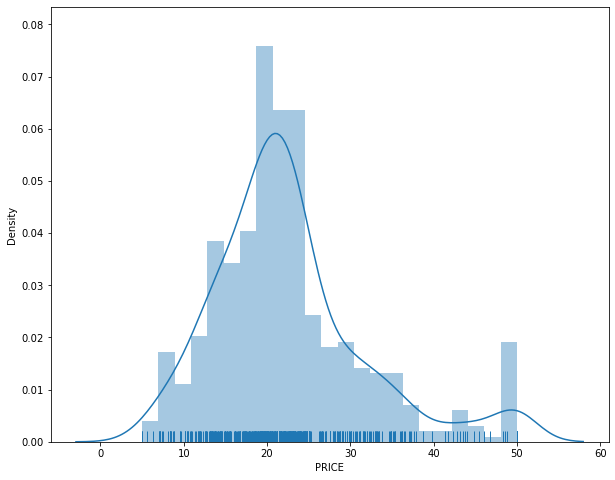

In [8]:
plt.figure(figsize=(10, 8))
sns.distplot(df['PRICE'], rug=True)
plt.show()

In [9]:
#FILTER METHODS

In [10]:
X=df.drop("PRICE",1)
y=df["PRICE"]

In [11]:
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_boston(return_X_y=True)
X.shape

(506, 13)

In [12]:
#1.Variance Threshold
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(X)

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

<AxesSubplot:>

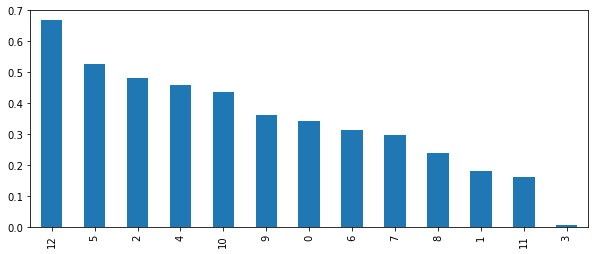

In [13]:
#2.Information gain/Mutual Information
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(X, y);
mi = pd.Series(mi)
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))

In [14]:
#3.SelectKBest Model
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest,SelectPercentile
skb = SelectKBest(score_func=f_classif, k=2) 
X_data_new = skb.fit_transform(X, y)
print('Number of features before feature selection: {}'.format(X.shape[1]))
print('Number of features after feature selection: {}'.format(X_data_new.shape[1]))

Number of features before feature selection: 13
Number of features after feature selection: 2


In [15]:
#4.Correlation Coefficient

In [16]:
cor=df.corr()

<AxesSubplot:>

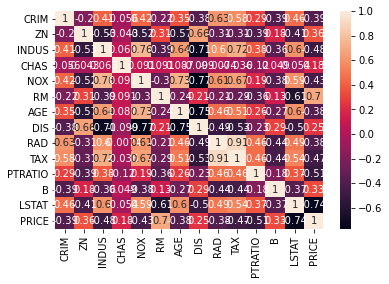

In [17]:
sns.heatmap(cor,annot=True)

In [18]:
#5.Mean Absolute Difference

<BarContainer object of 13 artists>

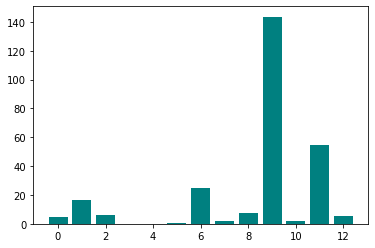

In [19]:
mad=np.sum(np.abs(X-np.mean(X,axis=0)),axis=0)/X.shape[0]
plt.bar(np.arange(X.shape[1]),mad,color='teal')

In [20]:
#Processing data into array type.
from sklearn import preprocessing
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)
print(y_transformed)

[137 113 196 193 203 165 126 156  64  87  52  87 114 102  80  97 128  73
 100  80  40  94  54  48  57  42  65  50  82 108  32  48  36  35  39  87
  98 108 144 176 197 153 149 144 110  91  98  65  47  92  95 103 146 131
  87 200 144 181 130  94  85  59 119 146 189 132  92 117  72 107 139 114
 125 131 138 111  98 106 110 101 159 136 145 126 136 153 122 119 133 165
 123 117 126 146 104 162 111 211 219 191 157 152  84  91  99  93  93 102
  96  92 114 125  86  85  83  81 110  90 102  91 117 101 103  71  86 111
  58  61  78  46  90  94 127  82  57  79  72  69  37  76  43  47  38  57
  25  41  57  49  76  56 112  94  55  92  68  57  35 213 140 130 155 228
 228 228 124 146 228 135 135 120  72  89 128 133 123 168 129 143 171 207
 212 203 210 186 151 169 228 183 170 197 206 174 204 178 167 228 192 173
 195 197 188 138 215 226 228 123 141 122 141  98 114  91 121 160 134 146
 130 165 112 127 154 114 157 172 221 228 209 181 224 180 140 182 214 225
 166 137 147 180 134 130 117  99 119 134  74  83 14

In [21]:
#6.Chi Square Test

In [22]:
X = X.astype(int)
chi2_selector = SelectKBest(chi2, k=2)
X_kbest = chi2_selector.fit_transform(X, y_transformed)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 13
Reduced number of features: 2


In [23]:
#7.SelectPercentile method
X_new = SelectPercentile(chi2, percentile=10).fit_transform(X, y_transformed)
X_new.shape

(506, 2)

In [49]:
#WRAPPER METHOD

In [25]:
#1.Forward feature selection

In [26]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

In [27]:
sfs = SFS(LinearRegression(),
          k_features=10,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)
sfs.fit(X, y)
sfs.k_feature_names_

('0', '1', '2', '3', '5', '7', '8', '10', '11', '12')

In [28]:
#2.Backward feature elimination

In [29]:
sbs = SFS(LinearRegression(),
         k_features=10,
         forward=False,
         floating=False,
         cv=0)
sbs.fit(X, y)
sbs.k_feature_names_

('0', '1', '3', '5', '7', '8', '9', '10', '11', '12')

In [30]:
#3.Bi-directional elimination

In [31]:
sffs = SFS(LinearRegression(),
         k_features=(3,7),
         forward=True,
         floating=True,
         cv=0)
sffs.fit(X, y)
sffs.k_feature_names_

('1', '3', '5', '7', '10', '11', '12')

In [32]:
#4.Recursive Feature Selection

In [33]:
from sklearn.feature_selection import RFE
lr=LinearRegression()

In [34]:
rfe=RFE(lr,n_features_to_select=7)
rfe.fit(X, y)

RFE(estimator=LinearRegression(), n_features_to_select=7)

In [35]:
print(X.shape, y.shape)

(506, 13) (506,)


In [36]:
rfe.transform(X)

array([[ 0,  2,  0, ...,  4, 15,  4],
       [ 0,  7,  0, ...,  4, 17,  9],
       [ 0,  7,  0, ...,  4, 17,  4],
       ...,
       [ 0, 11,  0, ...,  2, 21,  5],
       [ 0, 11,  0, ...,  2, 21,  6],
       [ 0, 11,  0, ...,  2, 21,  7]])

In [37]:
rfe.get_params(deep=True)

{'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__n_jobs': None,
 'estimator__normalize': False,
 'estimator__positive': False,
 'estimator': LinearRegression(),
 'importance_getter': 'auto',
 'n_features_to_select': 7,
 'step': 1,
 'verbose': 0}

In [38]:
rfe.support_

array([ True, False,  True,  True, False,  True, False,  True, False,
       False,  True, False,  True])

In [39]:
rfe.ranking_

array([1, 3, 1, 1, 7, 1, 6, 1, 2, 4, 1, 5, 1])

In [40]:
#EMBEDDED METHOD

In [41]:
#1.Random Forest Importance

In [42]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier().fit(X,y_transformed)
importances=model.feature_importances_

In [43]:
final_df=pd.DataFrame({"Features":pd.DataFrame(X).columns,"Importances":importances})
final_df.set_index("Importances")
final_df=final_df.sort_values("Importances")

<AxesSubplot:>

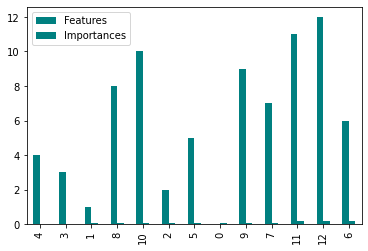

In [44]:
final_df.plot.bar(color="teal")